# Análise de indicadores da Amazônia Legal Brasileira: uma perspectiva data-driven 
 
`Projeto disciplinar INTI6 (2023) - Inteligência Artificial` - `Aplicar técnicas de Ciência de Dados em um conjunto de dados (dataset).`

> Pamela Dantas - CP3019012


Uma perspectiva data-driven é uma abordagem que se baseia em dados para tomar decisões.
Essa abordagem enfatiza a importância da coleta, análise e interpretação de dados para entender um problema e identificar soluções. es. 

## Contextualização

O desmatamento na Amazônia Legal Brasileira -- uma região de grande importância ecológica, econômica e social para o país -- é um problema grave que ameaça a integridade do local, causando a perda de biodiversidade, a redução da qualidade do solo e da água, e a intensificação do aquecimento e ebulição global. 

Acreditamos que este data-driven possa contribuir para a compreensão e o combate ao desmatamento da Amazônia Legal, pois o uso de dados é uma abordagem promissora para entender o problema. Por exemplo, podemos utilizar dos dados extraídos para:

* identificar tendências de desmatamento ao longo do tempo, entender as causas do desmatamento;
* identificar áreas com maior risco de desmatamento e áreas que precisam de atenção especial; 
* identificar correlações entre o desmatamento e outros fatores, como o desenvolvimento econômico, a pobreza e a mudança climática;
* identificar as regiões da Amazônia Legal com os maiores índices de pobreza; 
* comparar as tendências ambientais, socioeconômicas e epidemiológicas na Amazônia Legal ao longo do tempo. 

## Base de dados

##### Dataset 

A base de dados, chamada "Trajetória", contém 36 indicadores ambientais, socioeconômicos e epidemiológicos dos municípios dos nove estados da Amazônia Legal Brasileira no perído de 2000-2017. A "Trajetória" é resultado de um projeto do Centro de Síntese em Biodiversidade e Serviços Ecossistêmicos (SinBiose/CNPq).

##### Os indicadores são organizados em três dimensões principais:

* Dimensão Socioeconómica: Esta dimensão inclui indicadores relacionados com pobreza, educação, saúde e habitação;
* Dimensão Epidemiológica: Esta dimensão inclui indicadores relacionados às doenças transmitidas por vetores;
* Dimensão Ambiental: Esta dimensão inclui indicadores relacionados à perda de habitat, uso e cobertura da terra, redes de transporte e anomalias climáticas.

Cada dimensão é ainda dividida em subdimensões, que fornecem informações mais específicas sobre os indicadores. Por exemplo, a subdimensão “Pobreza” inclui indicadores relacionados ao Índice Multidimensional de Pobreza (IPM), enquanto a subdimensão “Doenças transmitidas por vetores” inclui indicadores relacionados à doença de Chagas, leishmaniose, leishmaniose visceral, dengue, malária falciparum, malária vivax e malária mista.

Os indicadores também estão organizados por linha temporal, que nos mostra o período de tempo para o qual os dados estão disponíveis. Por exemplo, o indicador “IPM” está disponível para os anos 2000 e 2010, enquanto o indicador “Doença” está disponível para os períodos 2004-2008 e 2015-2019.

Planilha - O que significa cada coluna do dataset: https://docs.google.com/spreadsheets/d/15nVf2VEOymfFIBGrhZrWQhHZCfe8RiRpHlmUmymQREQ/edit#gid=1369659124

Bibliografia:
>Ana C Rorato, Ana Paula Dal' Asta, Raquel M Lana, Ricardo B N dos Santos, Maria Isabel S Escada, Camila de M Vogt, Tatiana C Neves, Milton Barbosa, Cecilia S Andreazzi, Isabel C dos Reis, Danilo A Fernandes, Monica da Silva-Nunes, Annieli R de Souza, Antonio M V Monteiro, & Claudia T Codeço. (2022). Trajetorias dataset: environmental, epidemiological, and economic indicators for the Brazilian Amazon (1.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.7098053

### Importando o dataset do GitHub

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [2]:
# Indicadores de Dimensão Ambiental - Environmental_dimension_indicators
data_env = pd.read_csv("https://raw.githubusercontent.com/pameladantasp/AmazoniaLegalBrasileira-DataDriven--Projeto_INTI6/BaseDeDados/TRAJETORIAS_DATASET_Environmental_dimension_indicators.csv",\
                       delimiter=',', low_memory=False)

# Indicadores de Dimensão Epidemiológica - Epidemiological_dimension_indicators
data_epid = pd.read_csv("https://raw.githubusercontent.com/pameladantasp/AmazoniaLegalBrasileira-DataDriven--Projeto_INTI6/BaseDeDados/TRAJETORIAS_DATASET_Epidemiological_dimension_indicators.csv", \
                       delimiter=',', low_memory=False)

# Indicadores de Dimensão Socioeconomica - Socio-Economic_dimension-indicators
data_socio = pd.read_csv("https://raw.githubusercontent.com/pameladantasp/AmazoniaLegalBrasileira-DataDriven--Projeto_INTI6/BaseDeDados/TRAJETORIAS_DATASET_Socio-Economic_dimension-indicators.csv", \
                       delimiter=',', low_memory=False)


## 1. Pré-processamento - Preparando os datasets

### 1.1 Arrumando os datasets
O código abaixo:
1. retira as aspas dupla dos campos;
2. retira as aspas dupla da header;
3. seleciona as colunas que quero para a header, pois a atual está com tudo em 1 coluna;
4. separa as colunas com base no separador (,);
5. concatena as colunas selecionadas no data frame.

#### Epidemiological_dimension_indicators

In [3]:
data_epid.head(1)

,"state_abbrev,""state"",""municipality"",""geocode"",""period"",""zone"",""disease"",""cases"",""inc"""
0,"RO,""Rondônia"",""Alta Floresta D'Oeste"",1100015,..."


In [4]:
data_epid = data_epid.replace(r'"', '', regex=True)                      
data_epid.columns = data_epid.columns.map(lambda x: x.replace('"', '')) 

cols_to_use_epid = ['state_abbrev','state','municipality','geocode','period','zone','disease','cases','inc']
data_epid = data_epid['state_abbrev,state,municipality,geocode,period,zone,disease,cases,inc'].str.split(',', expand=True) 
data_epid.columns = cols_to_use_epid

In [5]:
data_epid.head(1)

,state_abbrev,state,municipality,geocode,period,zone,disease,cases,inc
0,RO,Rondônia,Alta Floresta D'Oeste,1100015,2004-2008,rural,chagas,0,0


#### Environmental_dimension_indicators

In [6]:
data_env.head(1)

,"state_abbrev,""state"",""municipality"",""geocode"",""period"",""refor"",""secveg"",""pasture"",""crop"",""urban"",""core"",""edge"",""port"",""river"",""road"",""mining"",""fire"",""dgorg"",""dgfor"",""defor"",""deorg"",""precp"",""precn"",""tempp"""
0,"AC,""Acre"",""Santa Rosa do Purus"",""1200435"",2006..."


In [7]:
data_env = data_env.replace(r'"', '', regex=True)                      
data_env.columns = data_env.columns.map(lambda x: x.replace('"', '')) 

cols_to_use_env = ['state_abbrev','state','municipality','geocode','period','refor','secveg','pasture','crop','urban','core','edge','port','river','road',
                   'mining','fire','dgorg','dgfor','defor','deorg','precp','precn','tempp']

data_env = data_env['state_abbrev,state,municipality,geocode,period,refor,secveg,pasture,crop,urban,core,edge,port,river,road,mining,fire,dgorg,dgfor,defor,deorg,precp,precn,tempp'].str.split(',', expand=True) 
data_env.columns = cols_to_use_env

In [8]:
data_env.head(1)

,state_abbrev,state,municipality,geocode,period,refor,secveg,pasture,crop,urban,...,road,mining,fire,dgorg,dgfor,defor,deorg,precp,precn,tempp
0,AC,Acre,Santa Rosa do Purus,1200435,2006,0.989033906077736,0.004425873753141,0.002312875961319,0,0,...,0,0,0.000223363859727,NA,NA,0.004258180188256,0.004232703201579,0.077975386211401,0,0.258956566625444


#### Socio-Economic_dimension-indicators

In [9]:
data_socio.head(1)

,"state_abbrev,""state"",""municipality"",""geocode"",""year"",""sit"",""carpond"",""h"",""a"",""ipm"",""csaude"",""ceduca"",""ccv"",""cnv"",""totpescar"",""totpesres"""
0,"RO,""Rondônia"",""Alta Floresta D'Oeste"",1100015,..."


In [10]:
data_socio = data_socio.replace(r'"', '', regex=True)
data_socio.columns = data_socio.columns.map(lambda x: x.replace('"', ''))

cols_to_use_env = ['state_abbrev','state','municipality','geocode','year','sit','carpond','h','a','ipm','csaude','ceduca','ccv','cnv','totpescar','totpesres']

data_socio = data_socio['state_abbrev,state,municipality,geocode,year,sit,carpond,h,a,ipm,csaude,ceduca,ccv,cnv,totpescar,totpesres'].str.split(',', expand=True) 
data_socio.columns = cols_to_use_env

In [11]:
data_socio.head(1)

,state_abbrev,state,municipality,geocode,year,sit,carpond,h,a,ipm,csaude,ceduca,ccv,cnv,totpescar,totpesres
0,RO,Rondônia,Alta Floresta D'Oeste,1100015,2000,rural,0.378771998,0.861731844,0.429082735,0.369754256,0.114733458,0.299188345,0.246599366,0.339478832,1234,1432


### 1.2 Test & Train
Separar um conjunto do train para validação (80/20).
> importando o dataset como "data_epid" e usando "test_epid" para testar, "train_epid" para treinar.


In [12]:
test_epid = data_epid
test_env = data_env
test_socio = data_socio

In [13]:
train_epid = data_epid
train_env = data_env
train_socio = data_socio

In [14]:
test_epid.head(1)

,state_abbrev,state,municipality,geocode,period,zone,disease,cases,inc
0,RO,Rondônia,Alta Floresta D'Oeste,1100015,2004-2008,rural,chagas,0,0


### 1.3 Filtrando dados/Cleaning
* Selecionar as features/colunas a serem usadas.
* Eliminar, concatenar ou converter dados, setar valores Null, etc.

In [15]:
data_env['refor'] = pd.to_numeric(data_env['refor'], errors='coerce')
data_env['secveg'] = pd.to_numeric(data_env['secveg'], errors='coerce')
data_env['pasture'] = pd.to_numeric(data_env['pasture'], errors='coerce')
data_env['crop'] = pd.to_numeric(data_env['crop'], errors='coerce')
data_env['mining'] = pd.to_numeric(data_env['mining'], errors='coerce')
data_env['urban'] = pd.to_numeric(data_env['urban'], errors='coerce')


data_epid['zone'] = data_epid['zone'].astype('category')
data_epid['disease'] = data_epid['disease'].astype('category')

In [16]:
data_epid.dtypes

state_abbrev      object
state             object
municipality      object
geocode           object
period            object
zone            category
disease         category
cases             object
inc               object
dtype: object

In [17]:
cols_to_convert = ['core', 'edge', 'port', 'river', 'road', 'fire', 'dgorg', 'dgfor', 'defor', 'deorg', 'precp', 'precn', 'tempp']
data_env[cols_to_convert] = data_env[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [18]:
data_epid.dtypes

state_abbrev      object
state             object
municipality      object
geocode           object
period            object
zone            category
disease         category
cases             object
inc               object
dtype: object

In [19]:
data_env.dtypes

state_abbrev     object
state            object
municipality     object
geocode          object
period           object
refor           float64
secveg          float64
pasture         float64
crop            float64
urban           float64
core            float64
edge            float64
port            float64
river           float64
road            float64
mining          float64
fire            float64
dgorg           float64
dgfor           float64
defor           float64
deorg           float64
precp           float64
precn           float64
tempp           float64
dtype: object

## 2. Gráficos para análise

A evolução do uso da terra ao longo do tempo. Destacando as diferentes categorias de uso (reflorestamento, vegetação secundária, pastagem, cultivo, mineração e áreas urbanas) e suas respectivas áreas

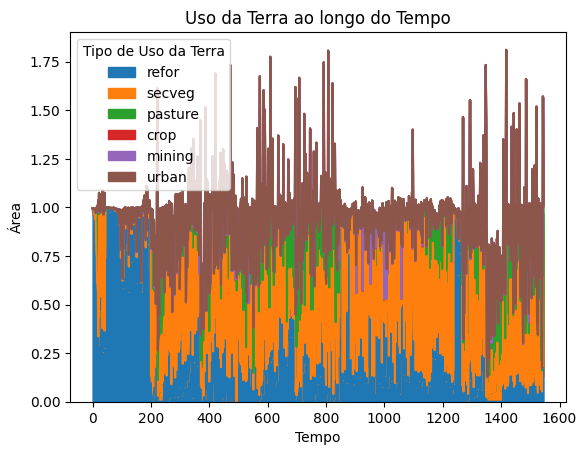

In [20]:
data_env[['refor', 'secveg', 'pasture', 'crop', 'mining', 'urban']].plot(kind='area', stacked=True)
plt.title('Uso da Terra ao longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Área')
plt.legend(title='Tipo de Uso da Terra')
plt.show()

Calcular a correlação entre variáveis numéricas após remover as colunas não-numéricas

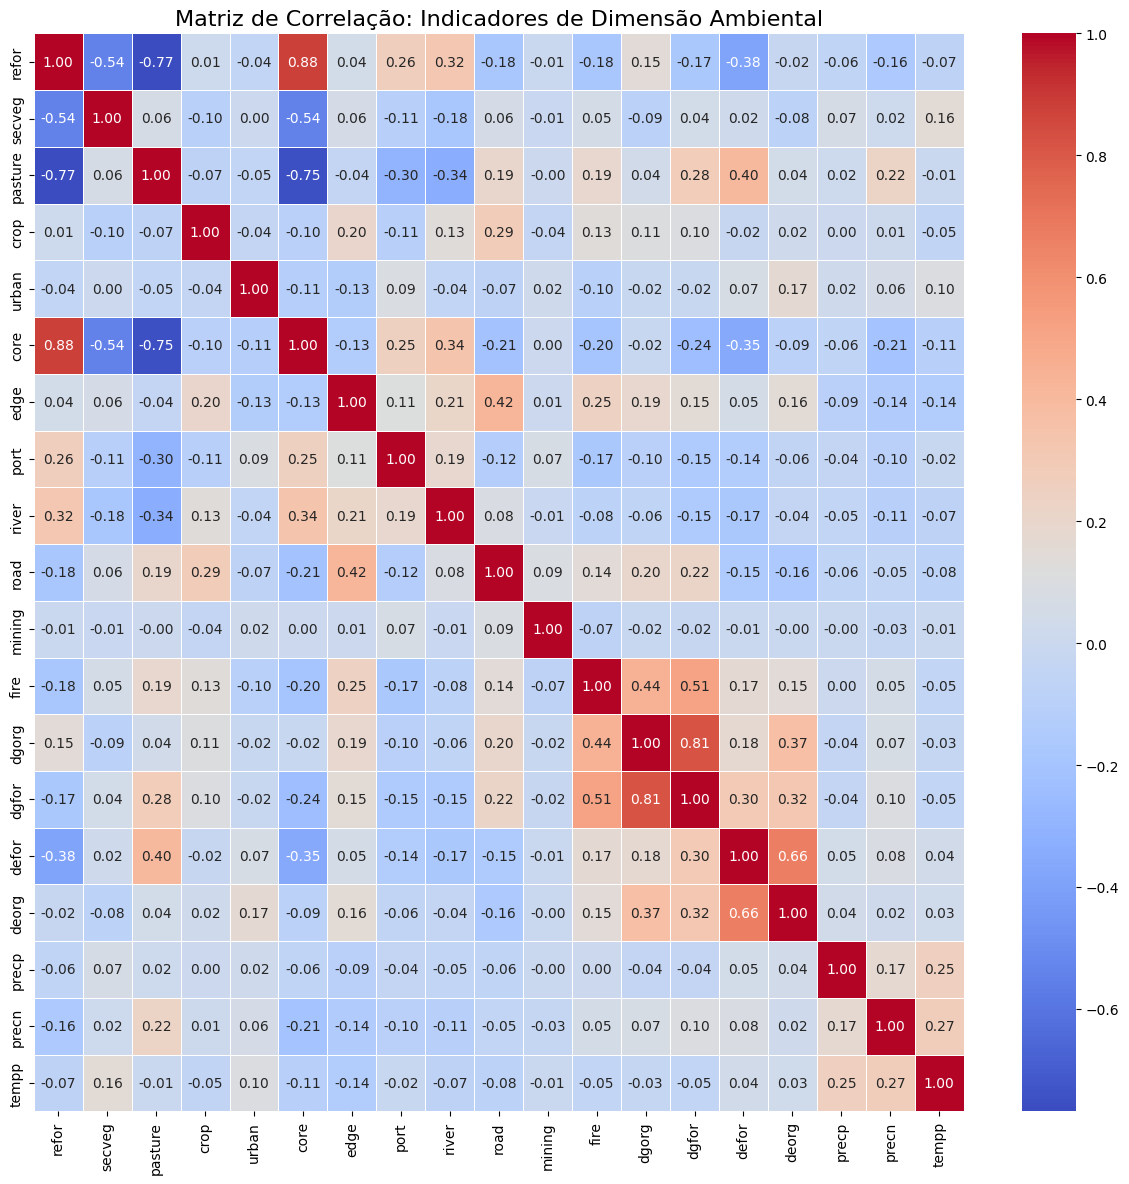

In [32]:
numeric_columns = data_env.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação: Indicadores de Dimensão Ambiental', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dados em múltiplas variáveis representadas em eixos radiais, mostrando como diferentes valores se comparam em várias categoria:

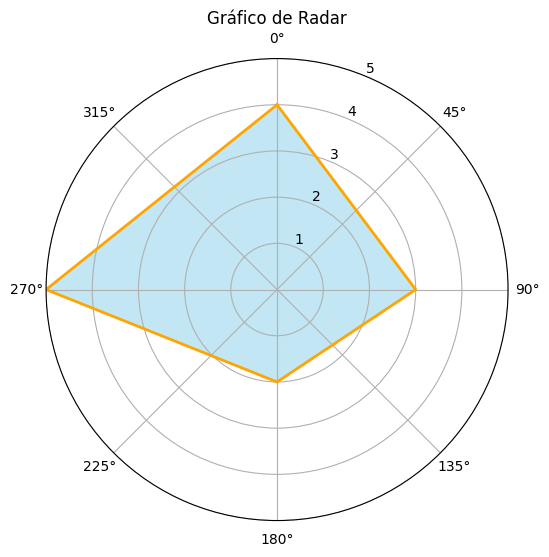

In [22]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [4, 3, 2, 5, 4]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(np.linspace(0, 2 * np.pi, len(values)), values, color='skyblue', alpha=0.5)
ax.plot(np.linspace(0, 2 * np.pi, len(values)), values, color='orange', linewidth=2)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, 5)

plt.title('Gráfico de Radar')
plt.show()


Dados que passam por diferentes estágios ou etapas, mostrando a progressão ou diminuição de quantidades à medida que avançam em direção a uma conclusão:

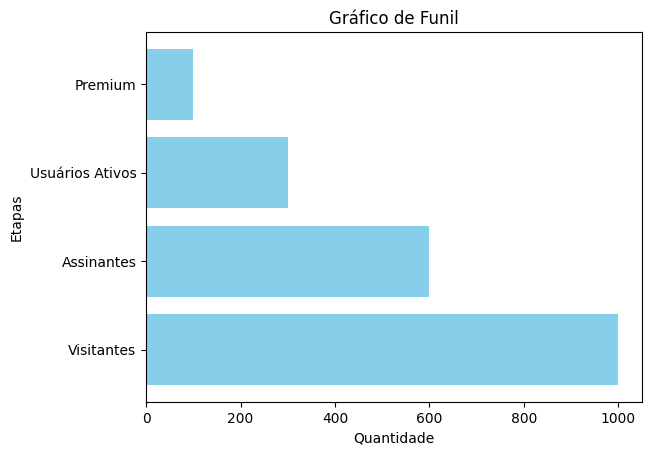

In [23]:
labels = ['Visitantes', 'Assinantes', 'Usuários Ativos', 'Premium']
sizes = [1000, 600, 300, 100]

fig, ax = plt.subplots()
ax.barh(labels, sizes, color='skyblue')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Etapas')
plt.title('Gráfico de Funil')
plt.show()


Visualizar a intensidade ou relação entre diferentes pontos de dados:

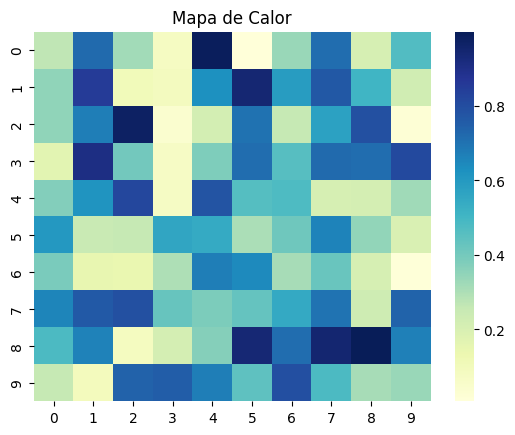

In [24]:
data = np.random.rand(10, 10)
sns.heatmap(data, cmap='YlGnBu')
plt.title('Mapa de Calor')
plt.show()

## 4. Tendencias

## 5. Conclusões

## 6. Relatório